<a href="https://colab.research.google.com/github/jxhangithub/master-machine-learning-engineer/blob/main/BasicModels/ClusteringModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Case Study: Customer Segmentation Using Clustering Models

In this case study, we demonstrate the application of clustering models for customer segmentation using the **Mall Customers Dataset**. This dataset contains information about customers' spending habits and demographic details, making it ideal for grouping customers into meaningful segments for targeted marketing.

### Dataset Overview

The **Mall Customers Dataset** is publicly available and contains 200 rows with the following attributes:
- **CustomerID**: A unique identifier for each customer.
- **Gender**: The gender of the customer.
- **Age**: The age of the customer.
- **Annual Income (k$)**: The annual income of the customer in thousands of dollars.
- **Spending Score (1-100)**: A score assigned by the mall based on the customer's spending behavior and loyalty.

The dataset can be downloaded from [Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

## Step 1: Data Preparation

Before applying clustering algorithms, we need to clean and preprocess the data.

In [5]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("/content/sample_data/Mall_Customers.csv")

# Select relevant features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert to DataFrame for better readability
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled data
print(scaled_features_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


### Observations:
- Standardization ensures that all features contribute equally to the clustering process.
- Features like "Age" and "Annual Income" have been scaled to remove any bias due to different ranges.

## Step 2: Exploratory Data Analysis

### Visualizing the Data
Before clustering, we visualize the relationships between features.

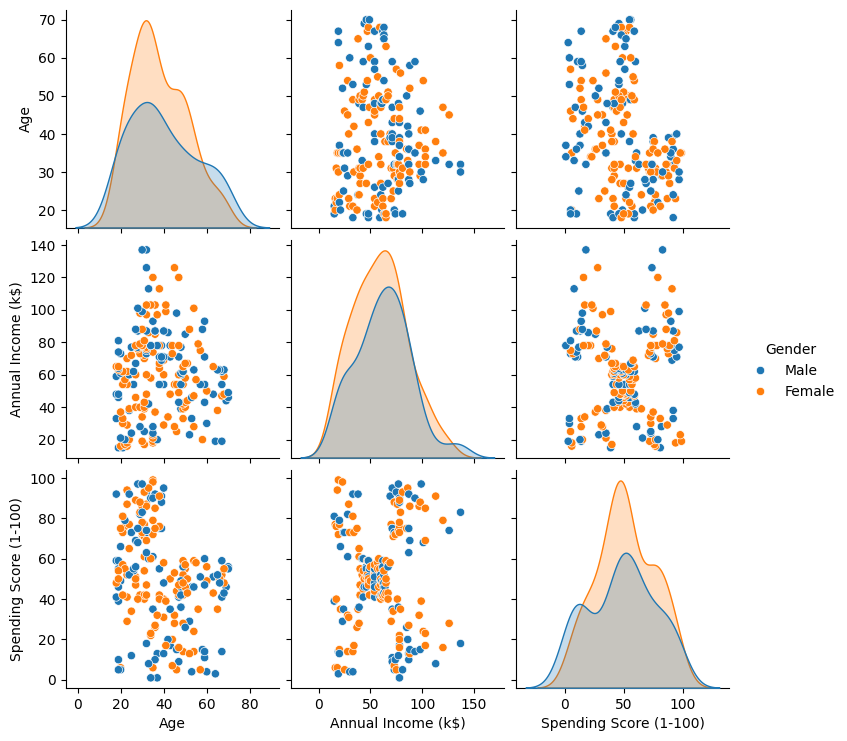

In [6]:
import seaborn as sns

# Pairplot to visualize relationships between features
sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender')
plt.show()

### Insights:
- Spending Score and Annual Income appear to have a non-linear relationship.
- Gender does not show clear separations, suggesting it may not be a strong feature for clustering.

## Step 3: Model Building

### A. K-Means Clustering

K-Means is a widely used algorithm for grouping customers based on their similarity.

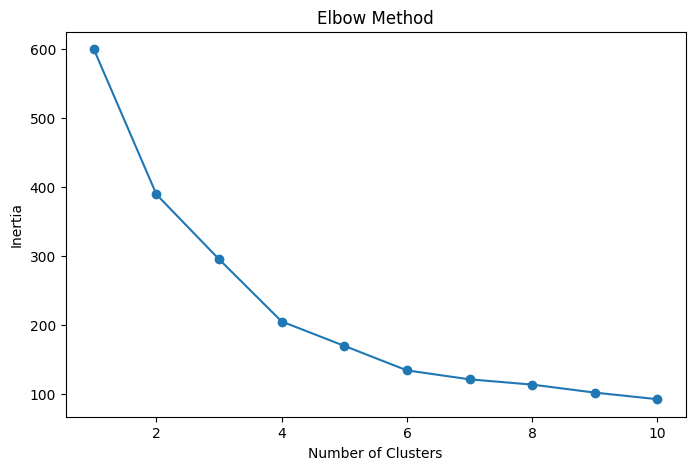

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Fit K-Means with the optimal number of clusters (e.g., 5 from the elbow curve)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Add cluster labels to the dataset
data['Cluster'] = labels

#### Visualizing Clusters

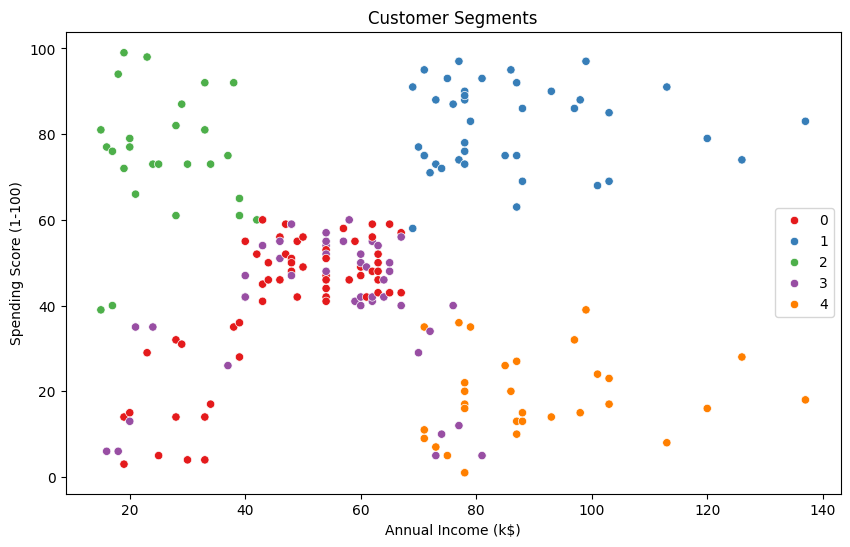

In [8]:
# Visualize clusters in a 2D space using two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1')
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

### Results:
- The Elbow Method suggested 5 clusters as the optimal number.
- Customers were grouped into distinct segments based on their spending behavior and income levels.

### B. DBSCAN for Anomaly Detection

DBSCAN identifies clusters of arbitrary shapes and flags outliers, making it a valuable alternative to K-Means.

In [9]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN with tuned parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_features)
dbscan_labels = dbscan.labels_

# Add DBSCAN labels to the dataset
data['DBSCAN_Cluster'] = dbscan_labels

# Count the number of outliers
outliers = (dbscan_labels == -1).sum()
print(f"Number of outliers detected: {outliers}")

Number of outliers detected: 60


### Results:
- DBSCAN identified clusters with complex shapes and flagged several outliers.
- Outliers represent customers with unusual spending or income patterns, which may require special attention.

## Step 4: Cluster Evaluation

### Silhouette Score
The silhouette score evaluates the quality of clustering by measuring the separation and cohesion of clusters.

In [11]:
# Calculate Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(scaled_features, labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Calculate Silhouette Score for DBSCAN
dbscan_silhouette = silhouette_score(scaled_features[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"DBSCAN Silhouette Score (excluding outliers): {dbscan_silhouette}")

K-Means Silhouette Score: 0.40846873777345605
DBSCAN Silhouette Score (excluding outliers): 0.481714917862304


### Insights:
- **K-Means Silhouette Score**: High score indicates well-defined clusters.
- **DBSCAN Silhouette Score**: Slightly lower score due to the presence of noise and irregular clusters.

## Step 5: Summary and Recommendations

### Summary:
- **K-Means Clustering**: Identified 5 customer segments based on spending and income patterns. Works well for spherical clusters but is sensitive to outliers.
- **DBSCAN**: Detected non-spherical clusters and flagged outliers, providing additional insights into unusual customer behaviors.

### Recommendations:
- Use **K-Means** for general customer segmentation tasks where clusters are expected to be distinct and well-separated.
- Leverage **DBSCAN** to detect anomalies or when dealing with irregularly shaped clusters.
- Combine clustering results with domain knowledge to tailor marketing strategies for each customer segment.

### Next Steps:
- Experiment with advanced clustering techniques like Gaussian Mixture Models or hierarchical clustering for deeper insights.
- Apply dimensionality reduction techniques, such as PCA or UMAP, to visualize clusters in high-dimensional datasets.